In [1]:
import os
import caselawnet
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
import networkx as nx
import community

[nltk_data] Downloading package punkt to /home/dafne/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
filepath = '/media/sf_VBox_Shared/CaseLaw/2018-01-29-lido/derived/'
#nodes_df = pd.read_csv(os.path.join(filepath, 'article_nodes_nodup_min5.csv'), index_col='id')
edges_df = pd.read_csv(os.path.join(filepath, 'case_to_case_lx_links.csv'))

In [3]:
edges_df.head()

,link_id,source,target
0,http://localhost:8984/bigdata/namespace/Regell...,http://linkeddata.overheid.nl/terms/jurisprude...,http://linkeddata.overheid.nl/terms/jurisprude...
1,http://localhost:8984/bigdata/namespace/Regell...,http://linkeddata.overheid.nl/terms/jurisprude...,http://linkeddata.overheid.nl/terms/jurisprude...
2,http://localhost:8984/bigdata/namespace/Regell...,http://linkeddata.overheid.nl/terms/jurisprude...,http://linkeddata.overheid.nl/terms/jurisprude...
3,http://localhost:8984/bigdata/namespace/Regell...,http://linkeddata.overheid.nl/terms/jurisprude...,http://linkeddata.overheid.nl/terms/jurisprude...
4,http://localhost:8984/bigdata/namespace/Regell...,http://linkeddata.overheid.nl/terms/jurisprude...,http://linkeddata.overheid.nl/terms/jurisprude...


In [4]:
graph = nx.from_pandas_edgelist(edges_df, source='source', target='target', create_using=nx.DiGraph())

## Assortativity

In [24]:
for att in attributes[1:]:
    ass = nx.attribute_assortativity_coefficient(graph, att)
    mod = community.modularity(nodes_df[att].to_dict(), graph)
    print(att, 'assortativity:', ass, 'modularity:', mod)

authority assortativity: 0.44028534616659437 modularity: 0.22271713532865095
book assortativity: 0.35516644114956414 modularity: 0.409178002901182
community assortativity: 0.7246170303282646 modularity: 0.5803499438513066


## Degree distributions

In [5]:
degree_hist = nx.degree_histogram(graph)

In [34]:
indegrees = list(dict(graph.in_degree()).values())
outdegrees = list(dict(graph.out_degree()).values())

In [6]:
len(degree_hist)

3862

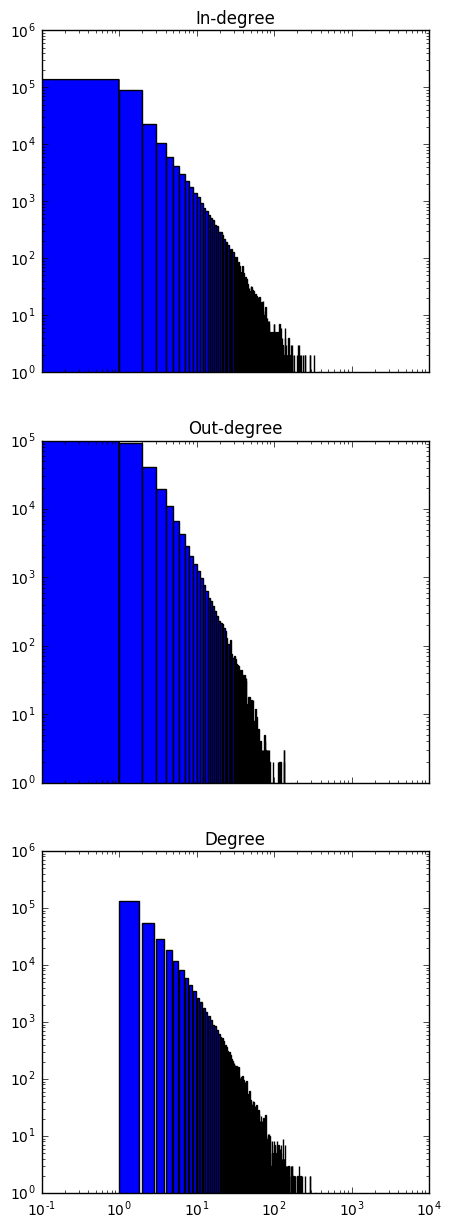

In [42]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(5, 15))
axes[0].hist(indegrees, bins=range(max(indegrees)))
axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].set_title('In-degree')

axes[1].hist(outdegrees,  bins=range(max(outdegrees)))
axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_title('Out-degree')

n = 500
axes[2].bar(range(500), degree_hist[:n])
axes[2].set_xscale("log")
axes[2].set_yscale("log")
axes[2].set_title('Degree')
plt.show()

## Connected components

In [10]:
import numpy as np

In [13]:
ccs = list(nx.connected_components(graph.to_undirected()))

In [14]:
ccs_multiple = [c for c in ccs if len(c) > 1]
ccs_sizes = np.array([len(c) for c in ccs])
ccs_multiple_sizes = np.array([len(c) for c in ccs_multiple])
print("Number of connected components:", len(ccs))
print("Relative size of largest component:", np.max(ccs_sizes)/np.sum(ccs_sizes))
print("Number of non-singleton components:", len(ccs_multiple_sizes))
print("Relative size of largest component without singletons:", np.max(ccs_multiple_sizes)/np.sum(ccs_multiple_sizes))

Number of connected components: 23507
Relative size of largest component: 0.813366300582
Number of non-singleton components: 23476
Relative size of largest component without singletons: 0.813453748405


In [19]:
# Save largest cc
gcc_ids = list(ccs[np.argmax(ccs_sizes)])
#nodes_gcc = nodes_df.loc[gcc_ids]
edges_gcc = edges_df[edges_df['source'].isin(gcc_ids) & edges_df['target'].isin(gcc_ids)]
#print(len(nodes_gcc), len(edges_gcc))
#nodes_gcc.to_csv(os.path.join(filepath, 'node__gcc.csv'))
edges_gcc.to_csv(os.path.join(filepath, 'case_to_case_links_lx_gcc.csv'), index=False)

In [43]:
edges_gcc.shape

(505337, 3)

## communities

In [37]:
community_sizes = nodes_df.groupby('community').size()
print("Number of communities:", len(community_sizes))
print("Average size of community", community_sizes.mean())

Number of communities: 398
Average size of community 40.2412060302
